# Project : Diabetes Prediction from Health Indicators

### Data Exploration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats
from scipy.stats import chi2
from scipy import stats

In [2]:
# Load the dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [4]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

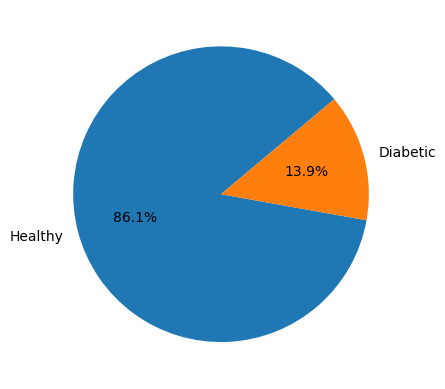

In [5]:
# Pie chart for target variable 'Diabetes_012'
labels = 'Healthy','Diabetic'
df.Diabetes_binary.value_counts().plot.pie(labels=labels, autopct='%1.1f%%', startangle=40, label='');

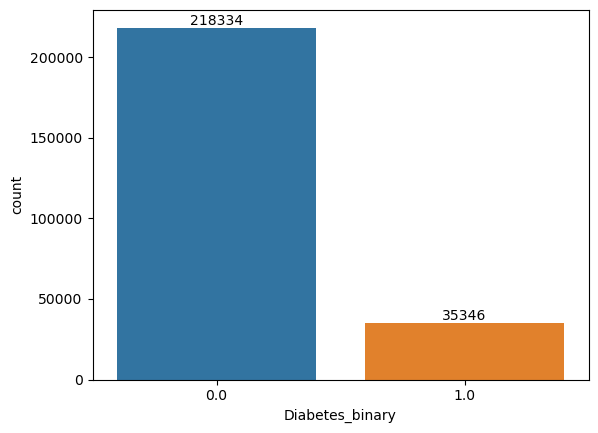

In [6]:
# Count plot for target variable
ax=sns.countplot(data=df, x='Diabetes_binary')
for i in ax.containers:
    ax.bar_label(i,)

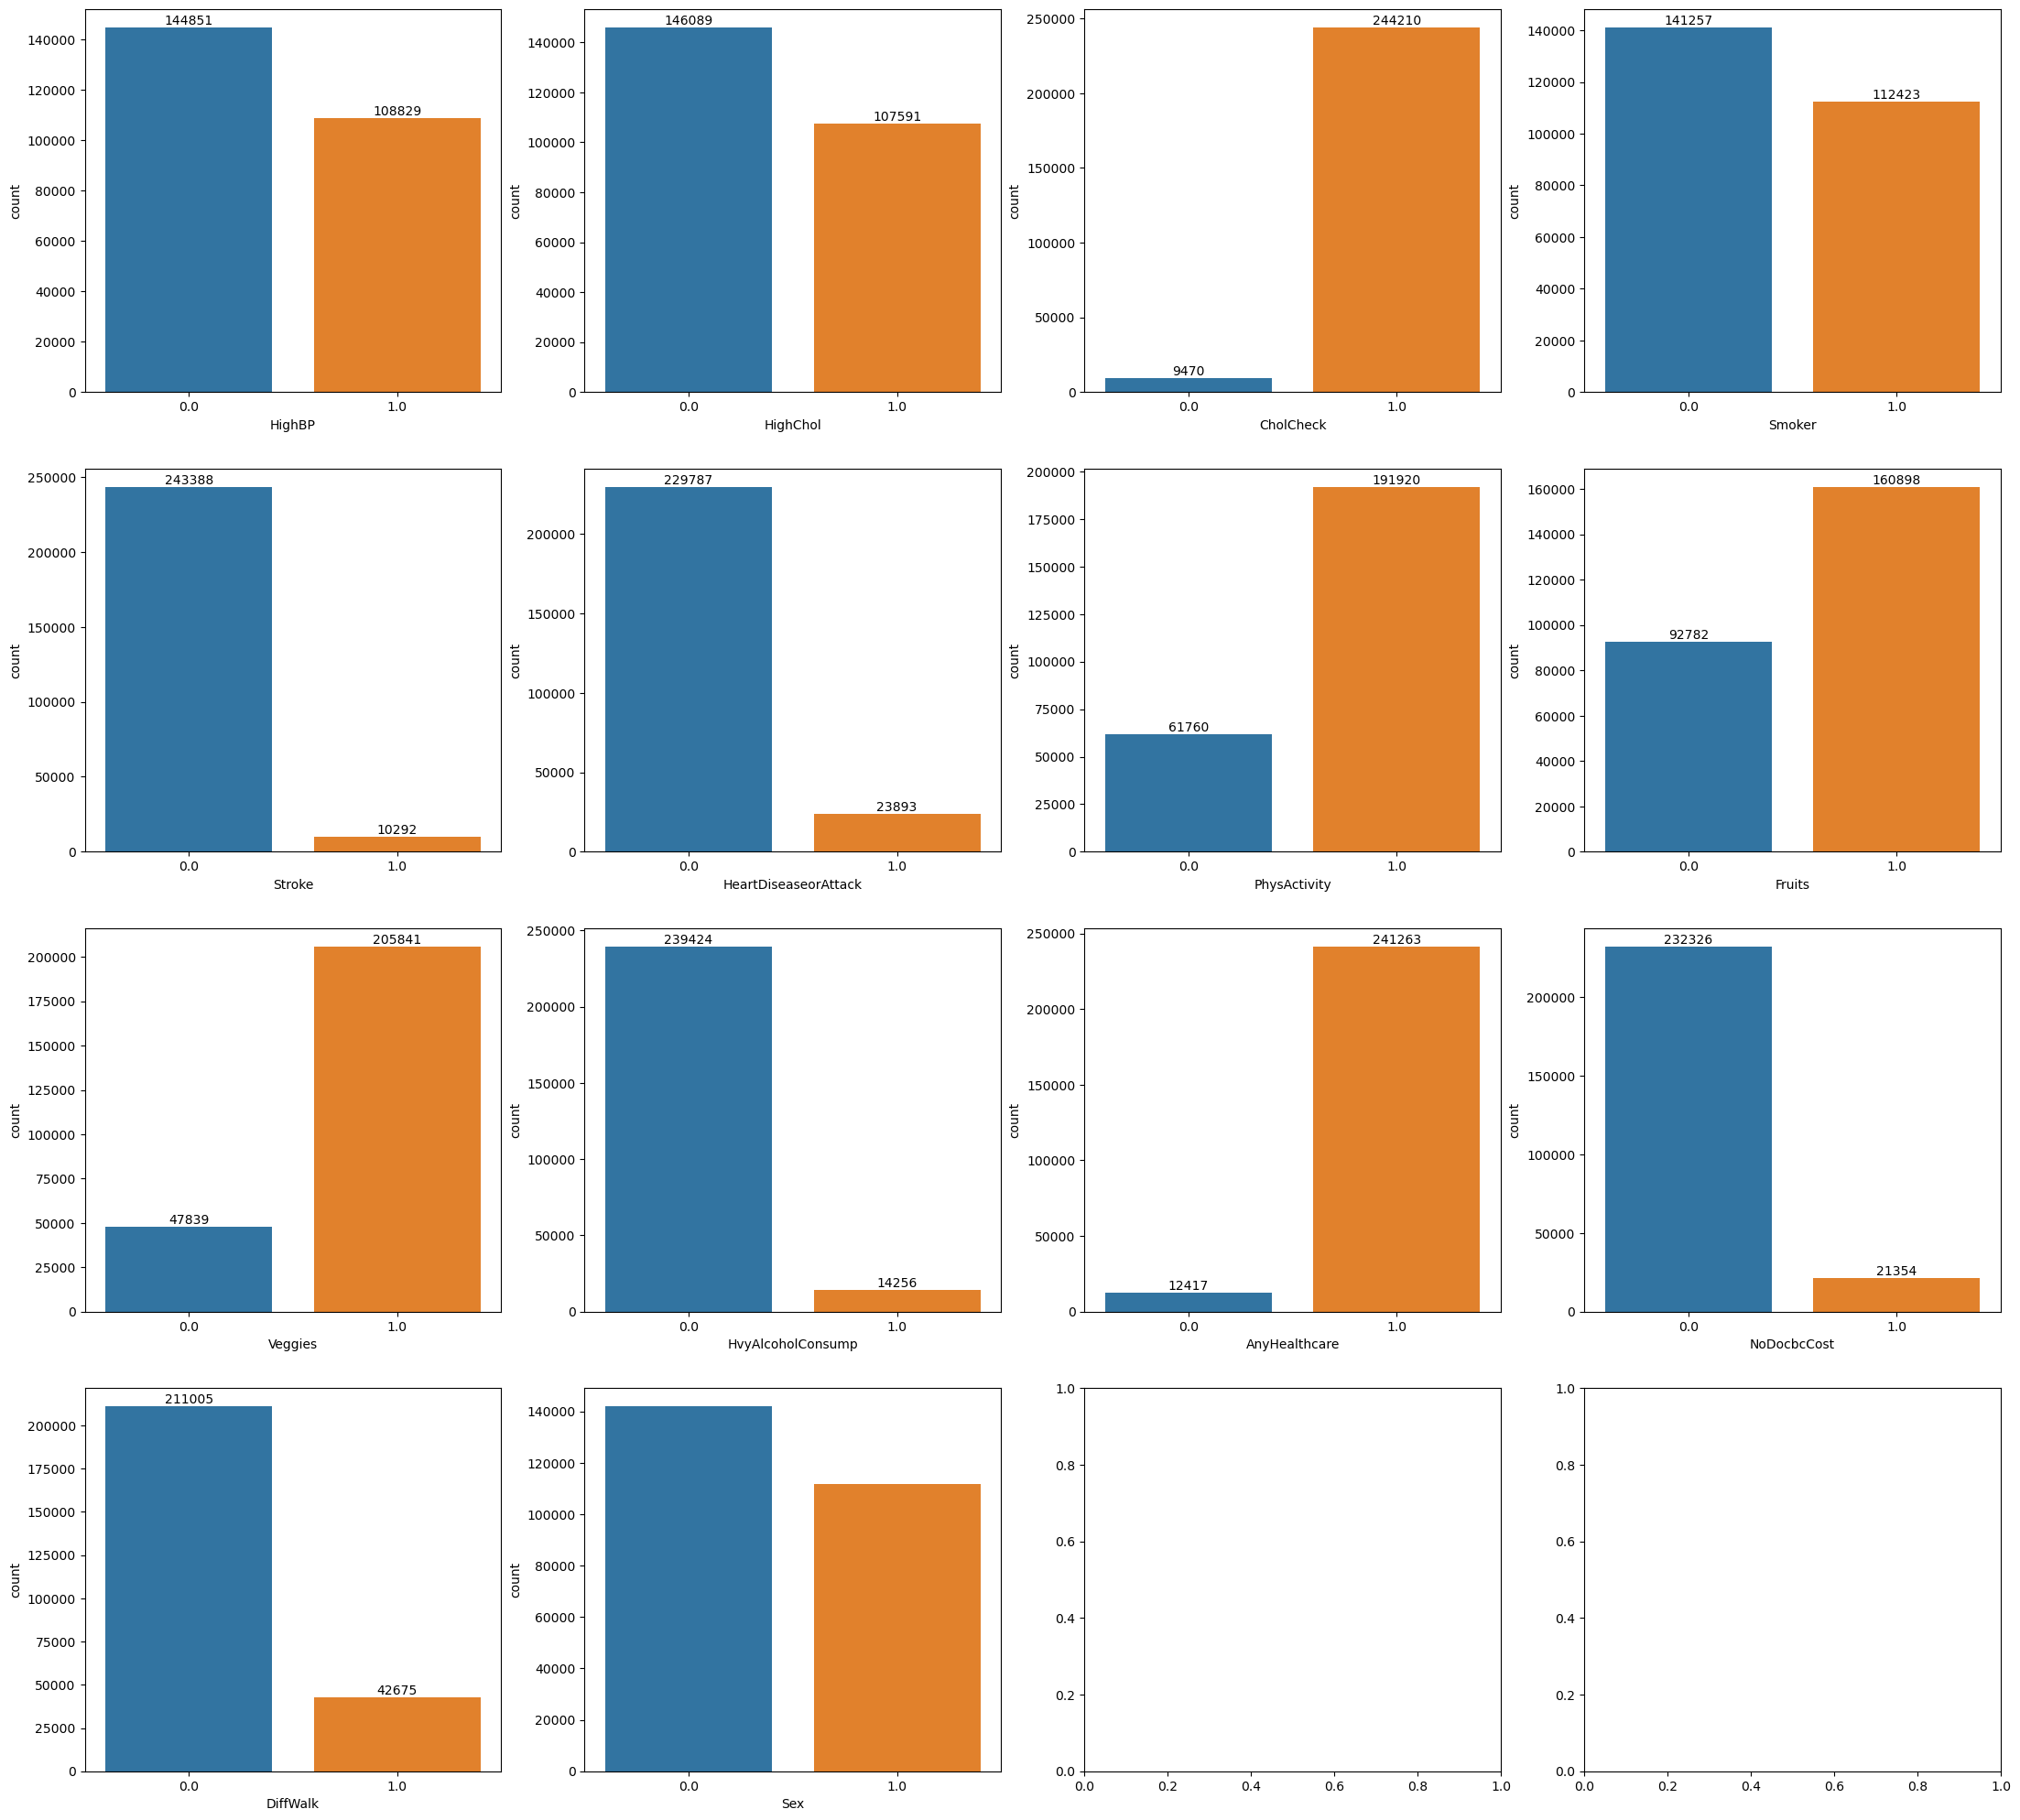

In [7]:
# Count plots for binary variables

fig, axes = plt.subplots(4, 4, figsize=(27,25))

ax1 = sns.countplot(ax=axes[0, 0], data=df, x='HighBP')
ax2 = sns.countplot(ax=axes[0, 1], data=df, x='HighChol')
ax3 = sns.countplot(ax=axes[0, 2], data=df, x='CholCheck')
ax4 = sns.countplot(ax=axes[0, 3], data=df, x='Smoker')
ax5 = sns.countplot(ax=axes[1, 0], data=df, x='Stroke')
ax6 = sns.countplot(ax=axes[1, 1], data=df, x='HeartDiseaseorAttack')
ax7 = sns.countplot(ax=axes[1, 2], data=df, x='PhysActivity')
ax8 = sns.countplot(ax=axes[1, 3], data=df, x='Fruits')
ax9 = sns.countplot(ax=axes[2, 0], data=df, x='Veggies')
ax10 = sns.countplot(ax=axes[2, 1], data=df, x='HvyAlcoholConsump')
ax11 = sns.countplot(ax=axes[2, 2], data=df, x='AnyHealthcare')
ax12 = sns.countplot(ax=axes[2, 3], data=df, x='NoDocbcCost')
ax13 = sns.countplot(ax=axes[3, 0], data=df, x='DiffWalk')
ax14 = sns.countplot(ax=axes[3, 1], data=df, x='Sex')

for i in ax1.containers:
    ax1.bar_label(i,)
    
for i in ax2.containers:
    ax2.bar_label(i,)

for i in ax3.containers:
    ax3.bar_label(i,)
    
for i in ax4.containers:
    ax4.bar_label(i,)
    
for i in ax5.containers:
    ax5.bar_label(i,)

for i in ax6.containers:
    ax6.bar_label(i,)
    
for i in ax7.containers:
    ax7.bar_label(i,)
    
for i in ax8.containers:
    ax8.bar_label(i,)

for i in ax9.containers:
    ax9.bar_label(i,)
    
for i in ax10.containers:
    ax10.bar_label(i,)

for i in ax11.containers:
    ax11.bar_label(i,)
    
for i in ax12.containers:
    ax12.bar_label(i,)
    
for i in ax13.containers:
    ax13.bar_label(i,)

# for i in ax14.containers:
#     ax14.bar_label(i,)

<Axes: xlabel='Income', ylabel='Count'>

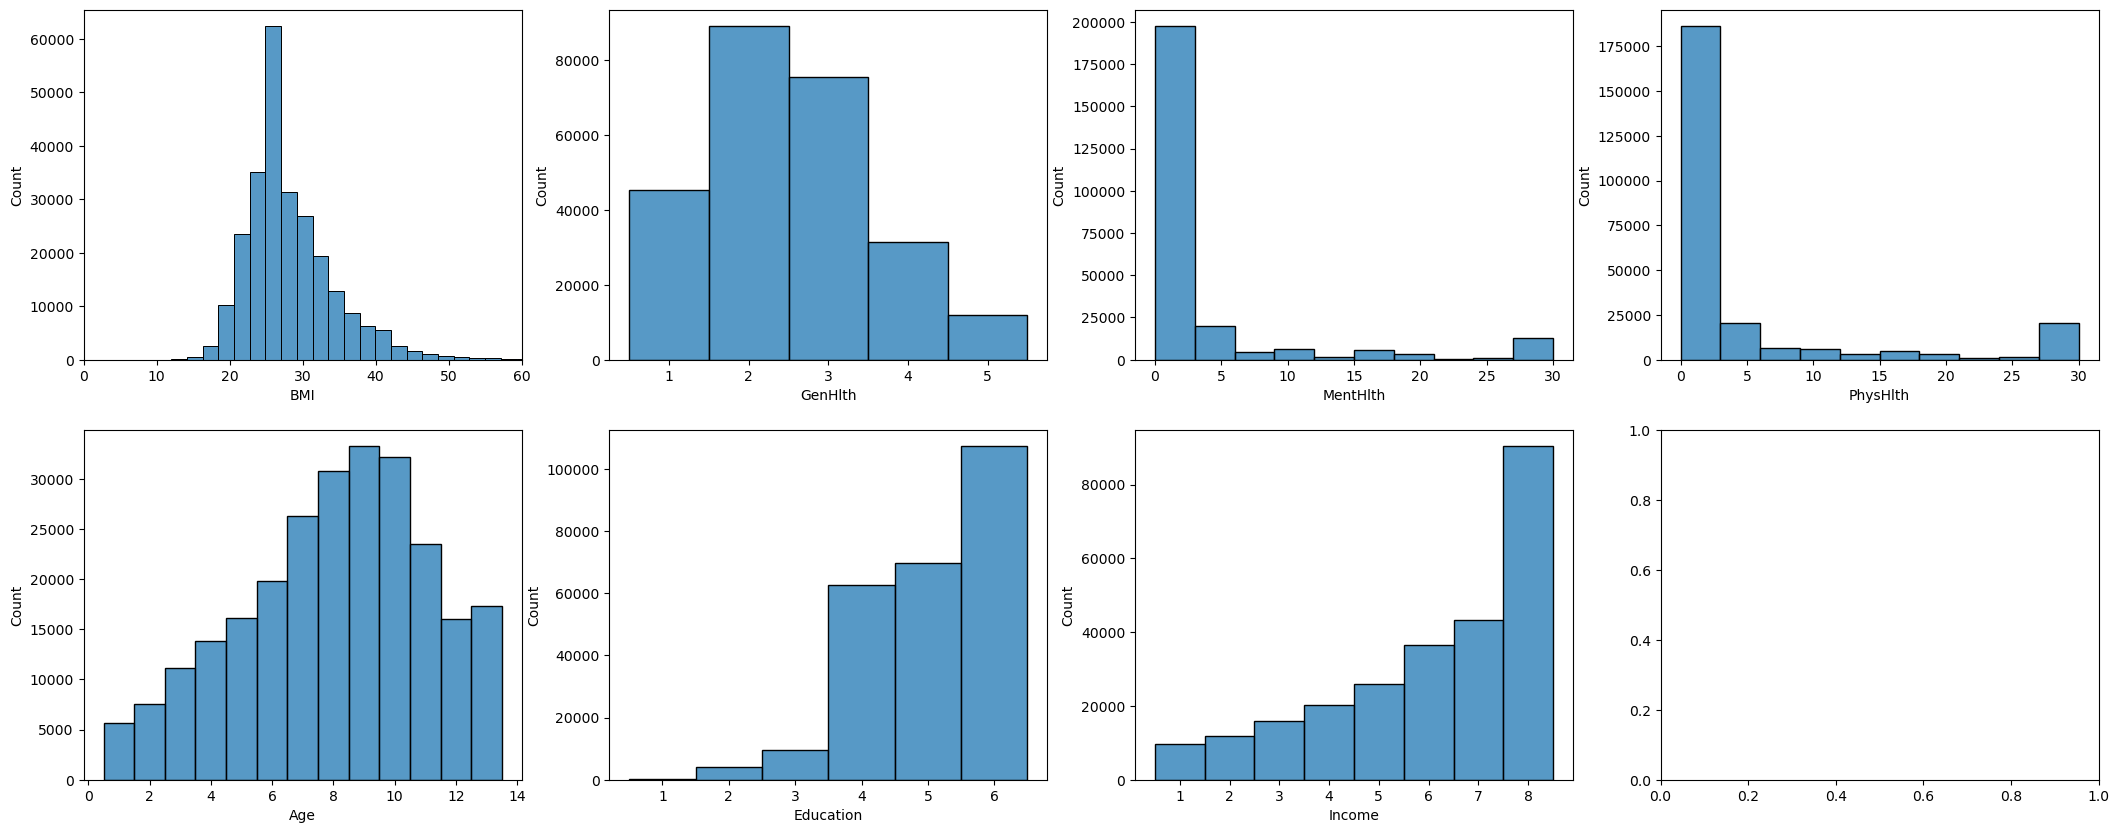

In [8]:
# Histograms for numeric variables

fig, axes = plt.subplots(2, 4, figsize=(26,10))

sns.histplot(ax=axes[0, 0], data=df, x="BMI", bins=40)
axes[0, 0].set_xlim(0,60)
sns.histplot(ax=axes[0, 1], data=df, x="GenHlth", discrete=True)
sns.histplot(ax=axes[0, 2], data=df, x="MentHlth", bins=10)
sns.histplot(ax=axes[0, 3], data=df, x="PhysHlth", bins=10)
sns.histplot(ax=axes[1, 0], data=df, x="Age", discrete=True)
sns.histplot(ax=axes[1, 1], data=df, x="Education", discrete=True)
sns.histplot(ax=axes[1, 2], data=df, x="Income", discrete=True)

<Axes: >

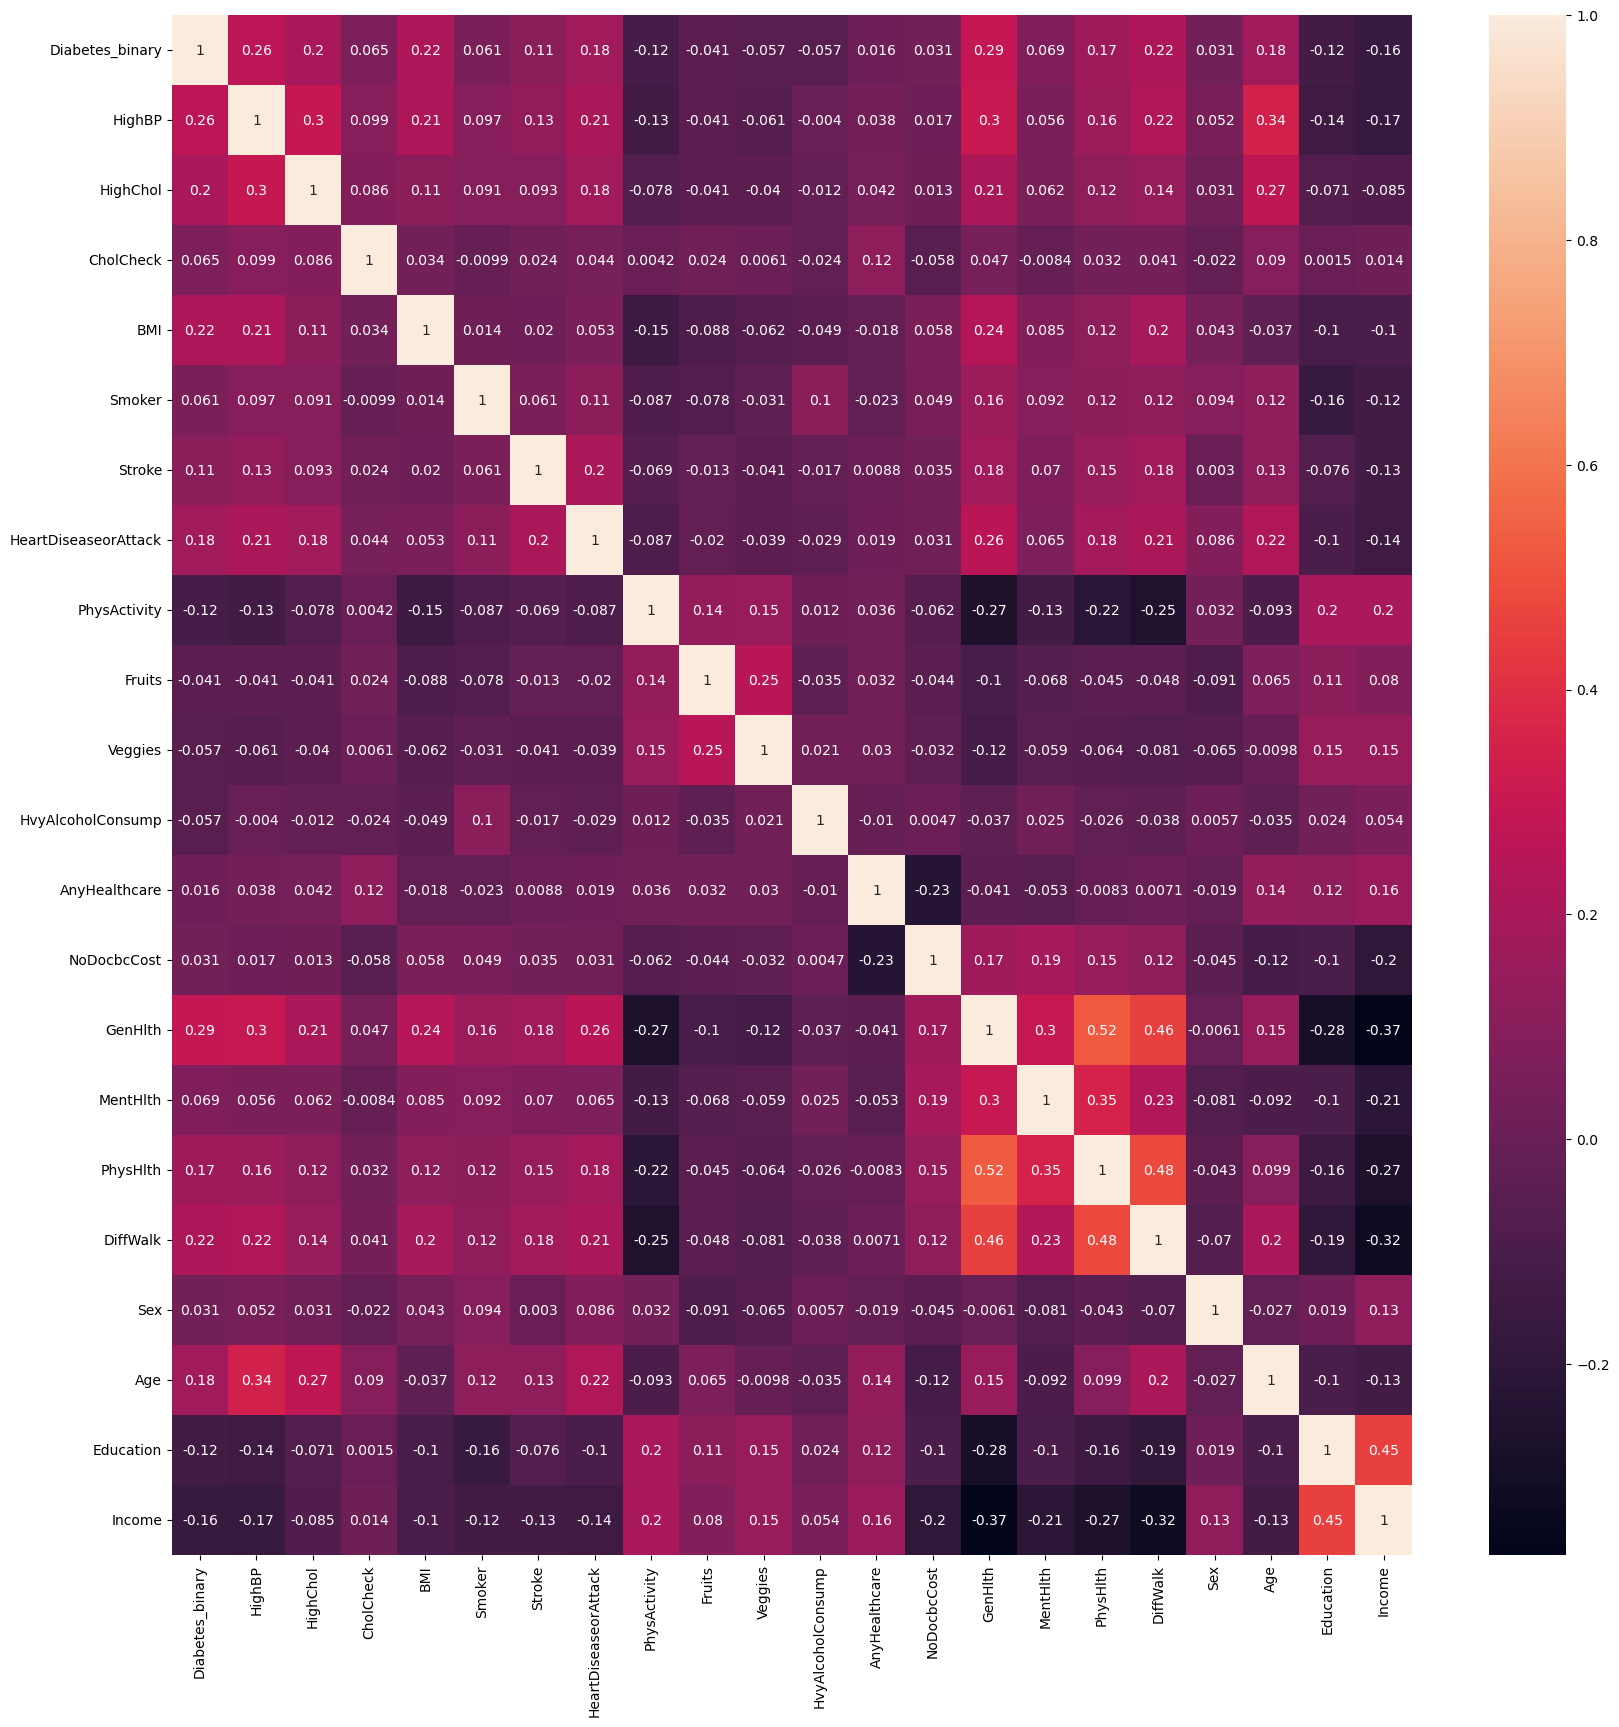

In [9]:
# Correlation heatmap for all variables
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

### Dimension Reduction

In [10]:
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import pearsonr

In [11]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [12]:
x = df[['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']]

 The PCA scores :                0         1         2         3         4         5         6
0       3.938752  0.797596  0.457037  0.549012  0.698055 -0.022165 -0.542490
1       0.441505 -0.529394  0.194478 -0.763594 -0.258081 -2.530424 -0.568373
2       3.816074  2.263866 -2.117000 -0.308808  0.483786  2.202473 -0.112776
3       0.248023 -1.862317  0.656276 -0.402573  0.355055  1.272845  0.311353
4      -0.030911 -1.235052 -0.349364 -0.502209  0.689224 -0.669848  0.110338
...          ...       ...       ...       ...       ...       ...       ...
253675 -0.021012  1.587194  1.408416  1.998868 -0.348543 -0.472571 -0.051610
253676  1.730174 -2.755133  0.266663 -1.580773 -0.510304  1.293905 -1.115803
253677 -0.492869  0.210255  1.803795 -1.694444 -0.322790 -1.697544  0.873030
253678  0.751364 -1.011319  0.453682 -1.291252 -0.363056 -1.872321 -0.516722
253679 -0.170585 -0.861304 -0.097272 -0.527703  0.282513 -2.149080  0.120548

[253680 rows x 7 columns]
 Explained variance : [2.326360

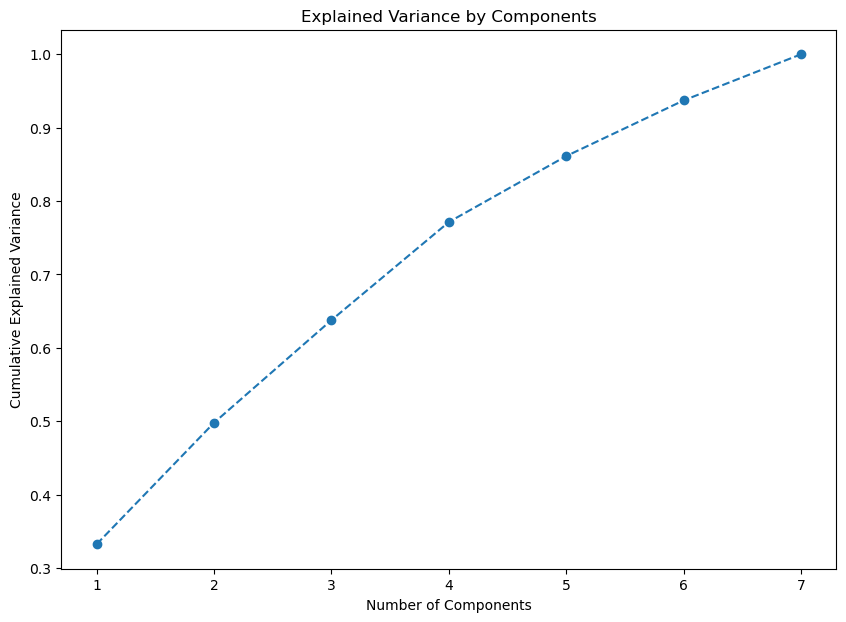

In [13]:
# Fitting the scaler to the data 'X' and transforming 'X' to standardize the features
scaler = StandardScaler()
X_standard = scaler.fit_transform(x)

# Initializing PCA to reduce the dimensionality of the data to 2 principal components
pca = PCA()

# Fit the PCA model to the data 'X' and transform it to get the principal components
pca_scores_4 = pd.DataFrame(pca.fit_transform(X_standard))

# Displaying the PCA scores
print(f" The PCA scores : {pca_scores_4}")

# Calculate and print the explained variance of each principal component
explained_var  = pca.explained_variance_
print(f" Explained variance : {explained_var}")

# Calculate and print the proportion of variance explained by each principal component
proportion_var = pca.explained_variance_ratio_
print(f" Proportion Variance : {proportion_var}")

# Calculate and print the cumulative proportion of variance
cummulative_proportion_var = np.cumsum(proportion_var)
print(f"Cumulative proportion : {cummulative_proportion_var}")


# Plotting Explained Variance by Components and number of components
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
# plt.axhline(y=.95, linewidth=2, color = 'k')
# plt.axvline(x =18.7, color='k')

plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### Applying the Dimension Reduction for Categorical Variable

In [14]:
df_columns = df.columns
df_ = df
for x in df_columns:
    contingency_table = pd.crosstab(df['Diabetes_binary'], df[x])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p == 0:
        print(f"There is a significant association between Diabetes_binary and {x} (reject H0).")
    else:
        print(f"There is no significant association between Diabetes_binary and {x} (fail to reject H0).")
        df_ = df_.drop([x], axis = 1)

There is a significant association between Diabetes_binary and Diabetes_binary (reject H0).
There is a significant association between Diabetes_binary and HighBP (reject H0).
There is a significant association between Diabetes_binary and HighChol (reject H0).
There is no significant association between Diabetes_binary and CholCheck (fail to reject H0).
There is a significant association between Diabetes_binary and BMI (reject H0).
There is no significant association between Diabetes_binary and Smoker (fail to reject H0).
There is a significant association between Diabetes_binary and Stroke (reject H0).
There is a significant association between Diabetes_binary and HeartDiseaseorAttack (reject H0).
There is a significant association between Diabetes_binary and PhysActivity (reject H0).
There is no significant association between Diabetes_binary and Fruits (fail to reject H0).
There is no significant association between Diabetes_binary and Veggies (fail to reject H0).
There is no signifi

In [15]:
print("Dataset shape:", df_.shape)

Dataset shape: (253680, 13)


In [16]:
df_.head()

,Diabetes_binary,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,1.0,40.0,0.0,0.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,5.0,4.0


### Model Performance and Evaluation

In [17]:
# Import libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pylab as plt
from tabulate import tabulate

In [18]:
# Split the target variable, y, and the predictor variables, x
x = df_.drop('Diabetes_binary', axis=1)
y = df_['Diabetes_binary']

In [19]:
# Standardise the dataset
scaler = preprocessing.MinMaxScaler()
x_minmax = scaler.fit_transform(x)
x_norm = pd.DataFrame(x_minmax, columns=['HighBP','HighChol','BMI','Stroke','HeartDiseaseorAttack','PhysActivity','GenHlth','PhysHlth','DiffWalk','Age','Education','Income'])
x_norm.head()

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,1.0,1.0,0.325581,0.0,0.0,0.0,1.00,0.5,1.0,0.666667,0.6,0.285714
1,0.0,0.0,0.151163,0.0,0.0,1.0,0.50,0.0,0.0,0.500000,1.0,0.000000
2,1.0,1.0,0.186047,0.0,0.0,0.0,1.00,1.0,1.0,0.666667,0.6,1.000000
3,1.0,0.0,0.174419,0.0,0.0,1.0,0.25,0.0,0.0,0.833333,0.4,0.714286
4,1.0,1.0,0.139535,0.0,0.0,1.0,0.25,0.0,0.0,0.833333,0.8,0.428571


In [20]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(x_norm, y)
# split data into train test validation set

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [21]:
# Dictionary to hold model metrics
model_metrics = {
    'Model': ['k-NN', 'Naïve Bayes', 'Classification Tree', 'Logistic Regression', 'Neural Network', 'Random Forest'],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
}

In [22]:
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

##### K-NN Classifier

In [23]:
# Measure accuracy of different k values
results = []
for k in range(1,20):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train,y_train)
    y_predicted_knn_ = knn_classifier.predict(X_test)
    results.append({'k':k, 'accuracy':accuracy_score(y_test,y_predicted_knn_)})
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.854711
1    2  0.829177
2    3  0.832383
3    4  0.820078
4    5  0.814643
5    6  0.809208
6    7  0.804024
7    8  0.801719
8    9  0.796467
9   10  0.795658
10  11  0.791513
11  12  0.791131
12  13  0.786864
13  14  0.787391
14  15  0.783681
15  16  0.783773
16  17  0.780902
17  18  0.781101
18  19  0.777696



 Optimal: k           1.000000
accuracy    0.854711
Name: 0, dtype: float64 



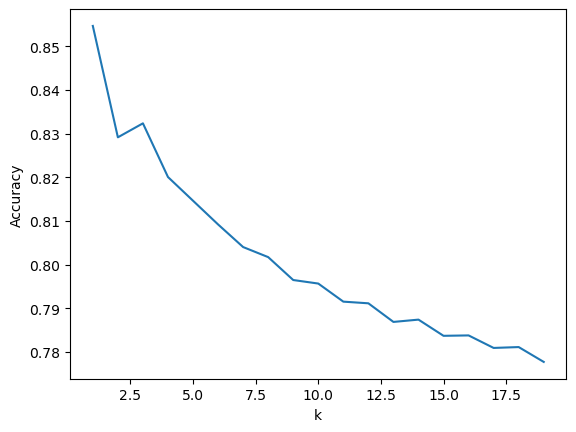

In [24]:
# Plot accuracy vs k
results.plot.line('k', 'accuracy', ylabel='Accuracy', legend=False)

# Optimal k
optimal_k = results.loc[results['accuracy'].idxmax()]
print(f"\n","Optimal:",optimal_k,f"\n")

In [25]:
# Run kNN with optimal k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

accuracy, precision, recall, f1 = compute_metrics(y_test, y_pred_knn)
    
# Store computed metrics
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1 Score'].append(f1)

In [26]:
# Confusion matrix
c_matrix_knn = confusion_matrix(y_test, y_pred_knn)
cmatrix_list=c_matrix_knn.tolist()
cmatrix_list[0].insert(0,'True 0')
cmatrix_list[1].insert(0,'True 1')
print('Confusion matrix:',f"\n")
print(tabulate(cmatrix_list,headers=['Predicted 0','Predicted 1']),f"\n")
    
# Classification report    
report_knn = classification_report(y_test, y_pred_knn, zero_division=0)

# accuracy
knn_acc = accuracy_score(y_test,y_pred_knn)
print('Classification report:',f"\n")
print(report_knn,f"\n")

Confusion matrix: 

          Predicted 0    Predicted 1
------  -------------  -------------
True 0          54268          11326
True 1           7707          57700 

Classification report: 

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85     65594
         1.0       0.84      0.88      0.86     65407

    accuracy                           0.85    131001
   macro avg       0.86      0.85      0.85    131001
weighted avg       0.86      0.85      0.85    131001
 



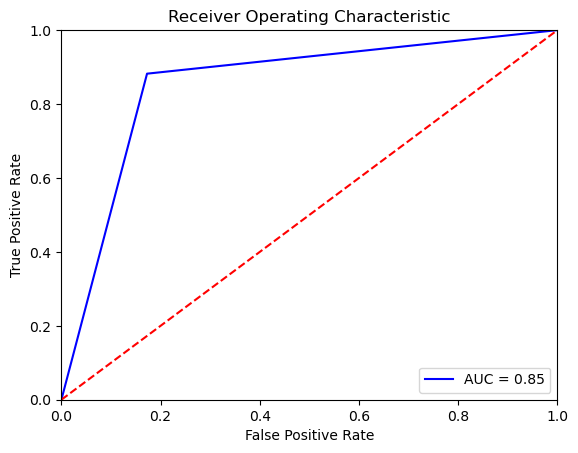

In [27]:
# Plotting ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Classification Tree

    max_depth  accuracy
0           1  0.690621
1           2  0.702590
2           3  0.725949
3           4  0.752277
4           5  0.760689
5           6  0.775070
6           7  0.788055
7           8  0.802070
8           9  0.817047
9          10  0.829375
10         11  0.840597
11         12  0.850436
12         13  0.854780
13         14  0.858314
14         15  0.862306
15         16  0.865345
16         17  0.868138
17         18  0.869627
18         19  0.870551

 Optimal: max_depth    19.000000
accuracy      0.870551
Name: 18, dtype: float64 



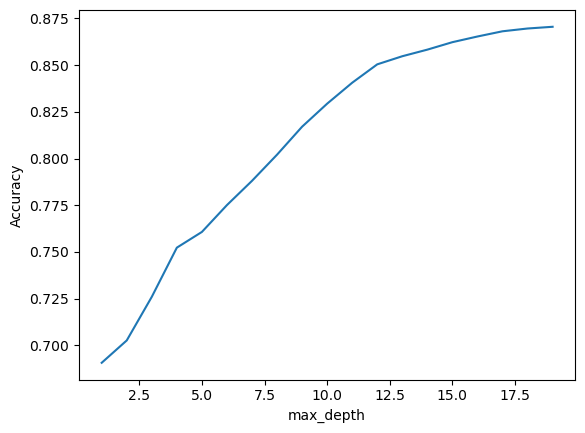

In [28]:
# Measure accuracy with different max_depth values
results_tree = []
for k in range(1,20):
    tree_classifier = DecisionTreeClassifier(max_depth=k, random_state=0)
    tree_classifier.fit(X_train, y_train)
    y_predicted_tree_ = tree_classifier.predict(X_test)
    results_tree.append({'max_depth':k, 'accuracy':accuracy_score(y_test,y_predicted_tree_)})  
results_tree = pd.DataFrame(results_tree)
print(results_tree)

# Plot accuracy vs max_depth
results_tree.plot.line('max_depth', 'accuracy', ylabel='Accuracy', legend=False)

# Optimal max_depth
optimal_max_depth = results_tree.loc[results_tree['accuracy'].idxmax()]
print(f"\n","Optimal:",optimal_max_depth,f"\n")

In [29]:
# Run tree classifier wtih optiaml max_depth = 19
tree = DecisionTreeClassifier(max_depth=19, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

accuracy, precision, recall, f1 = compute_metrics(y_test, y_pred_tree)
    
# Store computed metrics
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1 Score'].append(f1)

In [30]:
# Confusion matrix
c_matrix_tree = confusion_matrix(y_test, y_pred_tree)
cmatrix_list=c_matrix_tree.tolist()
cmatrix_list[0].insert(0,'True 0')
cmatrix_list[1].insert(0,'True 1')

print('Confusion matrix:',f"\n")
print(tabulate(cmatrix_list,headers=['Predicted 0','Predicted 1']),f"\n")
    
# Classification report    
report_tree = classification_report(y_test, y_pred_tree, zero_division=0)
print('Classification report:',f"\n")
print(report_tree,f"\n")

Confusion matrix: 

          Predicted 0    Predicted 1
------  -------------  -------------
True 0          57397           8197
True 1           8761          56646 

Classification report: 

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     65594
         1.0       0.87      0.87      0.87     65407

    accuracy                           0.87    131001
   macro avg       0.87      0.87      0.87    131001
weighted avg       0.87      0.87      0.87    131001
 



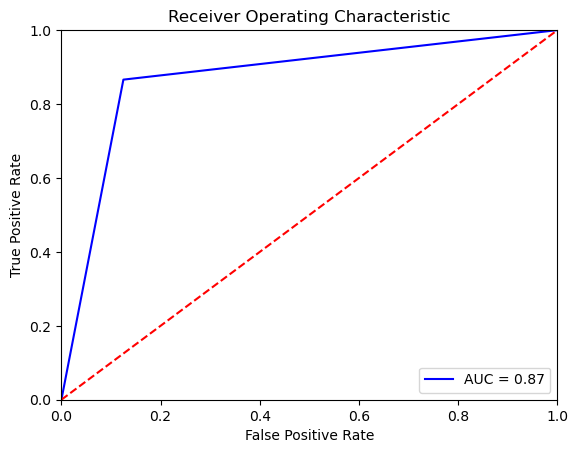

In [31]:
from sklearn.metrics import roc_curve, auc

# Plotting ROC

fpr, tpr, threshold = roc_curve(y_test, y_pred_tree)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Naive Bayes

In [32]:
# Run Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

accuracy, precision, recall, f1 = compute_metrics(y_test, y_pred_nb)
    
# Store computed metrics
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1 Score'].append(f1)

In [33]:
# Confusion matrix
c_matrix_nb = confusion_matrix(y_test, y_pred_nb)
cmatrix_list=c_matrix_nb.tolist()
cmatrix_list[0].insert(0,'True 0')
cmatrix_list[1].insert(0,'True 1')

print('Confusion matrix:',f"\n")
print(tabulate(cmatrix_list,headers=['Predicted 0','Predicted 1']),f"\n")
    
# Classification report    
report_nb = classification_report(y_test, y_pred_nb, zero_division=0)
print('Classification report:',f"\n")
print(report_nb,f"\n")

Confusion matrix: 

          Predicted 0    Predicted 1
------  -------------  -------------
True 0          51155          14439
True 1          24699          40708 

Classification report: 

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72     65594
         1.0       0.74      0.62      0.68     65407

    accuracy                           0.70    131001
   macro avg       0.71      0.70      0.70    131001
weighted avg       0.71      0.70      0.70    131001
 



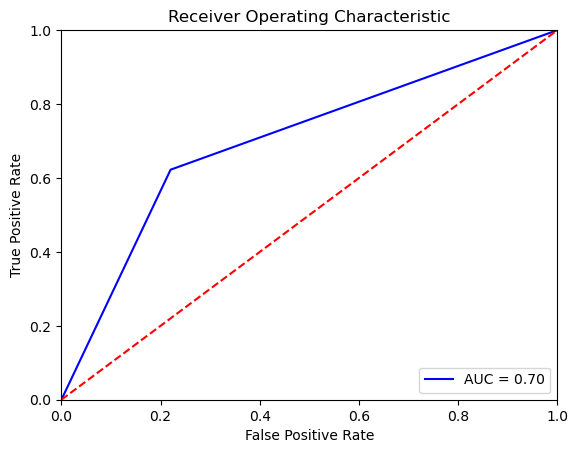

In [34]:
# Plotting ROC
fpr, tpr, threshold = roc_curve(y_test, y_pred_nb)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Logistic Regression

In [35]:
# Run logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

accuracy, precision, recall, f1 = compute_metrics(y_test, y_pred_logreg)
    
# Store computed metrics
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1 Score'].append(f1)

In [36]:
# Confusion matrix
c_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
cmatrix_list=c_matrix_logreg.tolist()
cmatrix_list[0].insert(0,'True 0')
cmatrix_list[1].insert(0,'True 1')

print('Confusion matrix:',f"\n")
print(tabulate(cmatrix_list,headers=['Predicted 0','Predicted 1']),f"\n")
    
# Classification report    
report_logreg = classification_report(y_test, y_pred_logreg, zero_division=0)
print('Classification report:',f"\n")
print(report_logreg,f"\n")

Confusion matrix: 

          Predicted 0    Predicted 1
------  -------------  -------------
True 0          47721          17873
True 1          15148          50259 

Classification report: 

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     65594
         1.0       0.74      0.77      0.75     65407

    accuracy                           0.75    131001
   macro avg       0.75      0.75      0.75    131001
weighted avg       0.75      0.75      0.75    131001
 



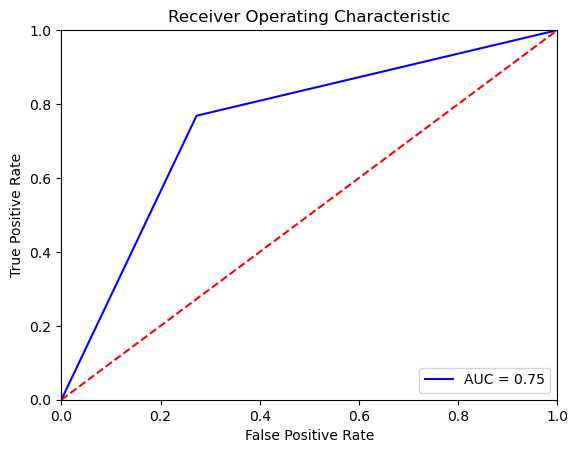

In [37]:
# Plotting ROC
fpr, tpr, threshold = roc_curve(y_test, y_pred_logreg)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Neural Networks

Epoch 1/12
9553/9553 [==============================] - 6s 607us/step - loss: 0.5105 - accuracy: 0.7474
Epoch 2/12
9553/9553 [==============================] - 6s 601us/step - loss: 0.5012 - accuracy: 0.7545
Epoch 3/12
9553/9553 [==============================] - 6s 598us/step - loss: 0.4997 - accuracy: 0.7550
Epoch 4/12
9553/9553 [==============================] - 6s 610us/step - loss: 0.4983 - accuracy: 0.7558
Epoch 5/12
9553/9553 [==============================] - 6s 597us/step - loss: 0.4975 - accuracy: 0.7563
Epoch 6/12
9553/9553 [==============================] - 6s 600us/step - loss: 0.4967 - accuracy: 0.7562
Epoch 7/12
9553/9553 [==============================] - 6s 645us/step - loss: 0.4958 - accuracy: 0.7572
Epoch 8/12
9553/9553 [==============================] - 6s 611us/step - loss: 0.4952 - accuracy: 0.7578
Epoch 9/12
9553/9553 [==============================] - 6s 612us/step - loss: 0.4946 - accuracy: 0.7579
Epoch 10/12
9553/9553 [==============================] - 6s 613u

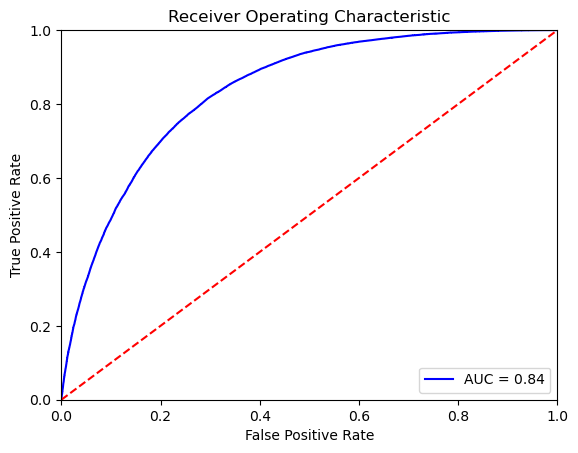

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_curve, auc


model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=12,batch_size=32,verbose=1);

# Generate predictions and convert to binary predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype("int32").flatten()

accuracy, precision, recall, f1 = compute_metrics(y_test, y_pred_binary)
    
# Store computed metrics
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1 Score'].append(f1)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_binary)

# Generate the classification report
class_report = classification_report(y_test, y_pred_binary, target_names=["0", "1"])

# Formatting the output
print("Confusion matrix:")
print(f"{'':<10}{'Predicted 0':<15}{'Predicted 1'}")
print(f"{'True 0':<10}{conf_mat[0, 0]:<15}{conf_mat[0, 1]}")
print(f"{'True 1':<10}{conf_mat[1, 0]:<15}{conf_mat[1, 1]}\n")
print("Classification report:")
print(class_report)
    
# Plotting ROC
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Random Forest Classifier

In [39]:
# Run random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy, precision, recall, f1 = compute_metrics(y_test, y_pred_rf)
    
# Store computed metrics
model_metrics['Accuracy'].append(accuracy)
model_metrics['Precision'].append(precision)
model_metrics['Recall'].append(recall)
model_metrics['F1 Score'].append(f1)

In [40]:
# Confusion matrix
c_matrix_rf = confusion_matrix(y_test, y_pred_rf)
cmatrix_list=c_matrix_rf.tolist()
cmatrix_list[0].insert(0,'True 0')
cmatrix_list[1].insert(0,'True 1')

print('Confusion matrix:',f"\n")
print(tabulate(cmatrix_list,headers=['Predicted 0','Predicted 1']),f"\n")
    
# Classification report    
report_rf = classification_report(y_test, y_pred_rf, zero_division=0)
print('Classification report:',f"\n")
print(report_rf,f"\n")

Confusion matrix: 

          Predicted 0    Predicted 1
------  -------------  -------------
True 0          59107           6487
True 1           7270          58137 

Classification report: 

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90     65594
         1.0       0.90      0.89      0.89     65407

    accuracy                           0.89    131001
   macro avg       0.90      0.89      0.89    131001
weighted avg       0.90      0.89      0.89    131001
 



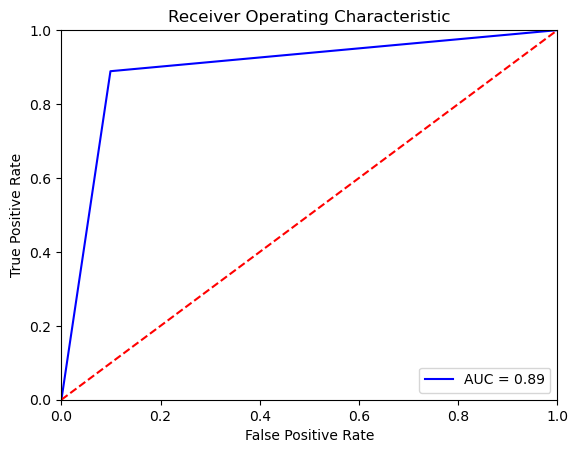

In [41]:
# Plotting ROC
fpr, tpr, threshold = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Summary of Model Performances

In [42]:
max_length = max(len(v) for v in model_metrics.values())
import numpy as np

for key in model_metrics:
    current_length = len(model_metrics[key])
    if current_length < max_length:
        model_metrics[key].extend([np.nan] * (max_length - current_length))
metrics_df = pd.DataFrame(model_metrics)
metrics_df = metrics_df.dropna()

print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0                 k-NN  0.854711   0.855809  0.854711  0.854606
1          Naïve Bayes  0.870551   0.870576  0.870551  0.870547
2  Classification Tree  0.701239   0.706235  0.701239  0.699361
3  Logistic Regression  0.747933   0.748378  0.747933  0.747832
4       Neural Network  0.759132   0.761120  0.759132  0.758694
5        Random Forest  0.894986   0.895040  0.894986  0.894981


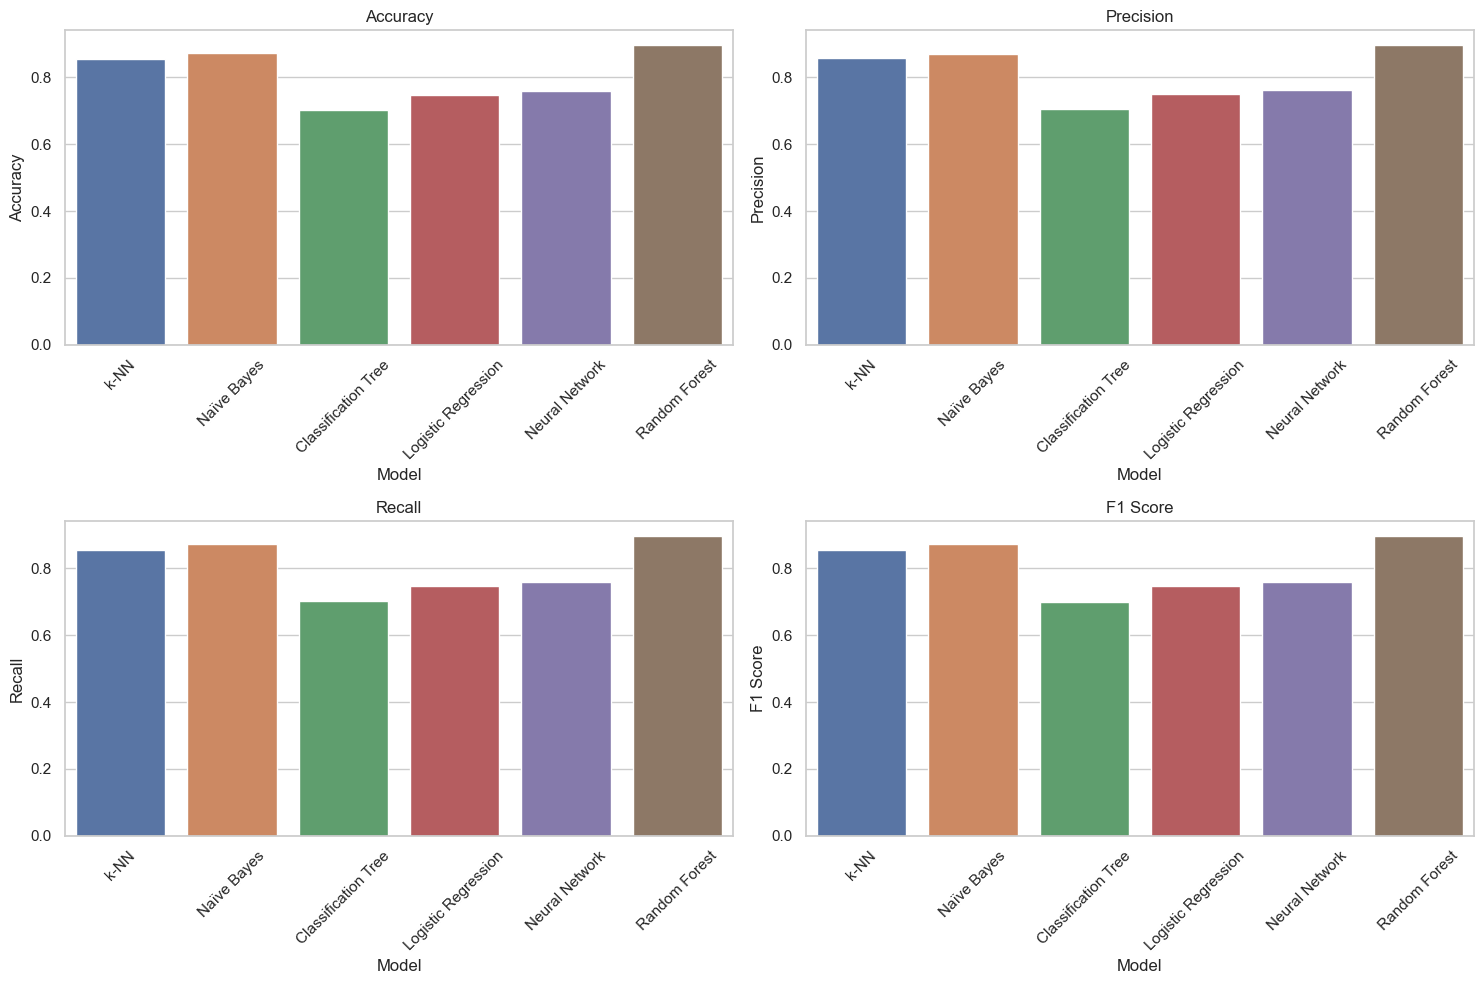

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Titles for each subplot
titles = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Iterate over each subplot and draw the bar plots
for ax, metric in zip(axs.flatten(), titles):
    sns.barplot(x='Model', y=metric, data=metrics_df, ax=ax)
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    for item in ax.get_xticklabels():
        item.set_rotation(45)  # Rotate Model names for better visibility

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
